In [1]:
!pip install open3d


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.3 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [2]:
!pip install brotli


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 48.3 MB/s eta 0:00:00


In [15]:
import os
import zipfile
import brotli

zip_path = "/Day_Data.zip"
output_dir = "decompressed_pcd_files_3"
os.makedirs(output_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for filename in zip_ref.namelist():
        if filename.endswith(".pcd.br"):
            with zip_ref.open(filename) as f_in:
                compressed_data = f_in.read()
                try:
                    decompressed_data = brotli.decompress(compressed_data)

                    # Create corresponding path for the .pcd file
                    new_filename = filename.replace(".pcd.br", ".pcd")
                    out_path = os.path.join(output_dir, new_filename)

                    # Create subdirectories if they don't exist
                    os.makedirs(os.path.dirname(out_path), exist_ok=True)

                    # Write decompressed data to .pcd
                    with open(out_path, "wb") as f_out:
                        f_out.write(decompressed_data)

                    print(f"✅ Decompressed: {filename} → {new_filename}")
                except Exception as e:
                    print(f"❌ Error decompressing {filename}: {e}")


✅ Decompressed: Day_Data/100050914245_day/2024-03-27-08-52-14_day/centre.pcd.br → Day_Data/100050914245_day/2024-03-27-08-52-14_day/centre.pcd
✅ Decompressed: Day_Data/100050914245_day/2024-03-27-08-52-14_day/icp_merged.pcd.br → Day_Data/100050914245_day/2024-03-27-08-52-14_day/icp_merged.pcd
✅ Decompressed: Day_Data/100050950866/10095307902/2024-03-25-17-11-54_day/centre.pcd.br → Day_Data/100050950866/10095307902/2024-03-25-17-11-54_day/centre.pcd
✅ Decompressed: Day_Data/100050950866/10095307902/2024-03-25-17-11-54_day/icp_merged.pcd.br → Day_Data/100050950866/10095307902/2024-03-25-17-11-54_day/icp_merged.pcd
✅ Decompressed: Day_Data/100050950866/2024-03-27-08-52-14_day/centre.pcd.br → Day_Data/100050950866/2024-03-27-08-52-14_day/centre.pcd
✅ Decompressed: Day_Data/100050950866/2024-03-27-08-52-14_day/icp_merged.pcd.br → Day_Data/100050950866/2024-03-27-08-52-14_day/icp_merged.pcd
✅ Decompressed: Day_Data/100050950913/2024-03-27-08-52-14_day/centre.pcd.br → Day_Data/100050950913/20

In [16]:
import os
import open3d as o3d

# Paths
pcd_folder = "/content/decompressed_pcd_files_3"
ply_output_folder = "/content/converted_ply_files_2"

# Walk through all subdirectories
for root, dirs, files in os.walk(pcd_folder):
    for filename in files:
        if filename.endswith(".pcd"):
            pcd_path = os.path.join(root, filename)

            # Compute relative path to preserve folder structure
            rel_path = os.path.relpath(pcd_path, pcd_folder)
            ply_rel_path = rel_path.replace(".pcd", ".ply")
            ply_path = os.path.join(ply_output_folder, ply_rel_path)

            # Create output directory if it doesn't exist
            os.makedirs(os.path.dirname(ply_path), exist_ok=True)

            # Read and convert
            try:
                pcd = o3d.io.read_point_cloud(pcd_path)
                o3d.io.write_point_cloud(ply_path, pcd)
                print(f"✅ Converted: {rel_path} → {ply_rel_path}")
            except Exception as e:
                print(f"❌ Failed to convert {rel_path}: {e}")

print(f"\n🎉 All conversions saved to: {ply_output_folder}")


✅ Converted: Day_Data/100050950866/2024-03-27-08-52-14_day/centre.pcd → Day_Data/100050950866/2024-03-27-08-52-14_day/centre.ply
✅ Converted: Day_Data/100050950866/2024-03-27-08-52-14_day/icp_merged.pcd → Day_Data/100050950866/2024-03-27-08-52-14_day/icp_merged.ply
✅ Converted: Day_Data/100050950866/10095307902/2024-03-25-17-11-54_day/centre.pcd → Day_Data/100050950866/10095307902/2024-03-25-17-11-54_day/centre.ply
✅ Converted: Day_Data/100050950866/10095307902/2024-03-25-17-11-54_day/icp_merged.pcd → Day_Data/100050950866/10095307902/2024-03-25-17-11-54_day/icp_merged.ply
✅ Converted: Day_Data/100050951099/2024-03-27-08-52-14_day/centre.pcd → Day_Data/100050951099/2024-03-27-08-52-14_day/centre.ply
✅ Converted: Day_Data/100050951099/2024-03-27-08-52-14_day/icp_merged.pcd → Day_Data/100050951099/2024-03-27-08-52-14_day/icp_merged.ply
✅ Converted: Day_Data/100050950969/2024-03-27-08-52-14_day/centre.pcd → Day_Data/100050950969/2024-03-27-08-52-14_day/centre.ply
✅ Converted: Day_Data/100

In [20]:
import shutil

# Zip the folder
shutil.make_archive("converted_ply_files_2", 'zip', "/content/converted_ply_files_2")
from google.colab import files

# Download the zip file
files.download("converted_ply_files_2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# http://www.open3d.org/docs/release/getting_started.html
!pip install open3d

#libraries used
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

In [23]:
#create paths and load data
input_path="/content/converted_ply_files_2/Day_Data/100050914245_day/2024-03-27-08-52-14_day/"
dataname="icp_merged.ply"

pcd = o3d.io.read_point_cloud(input_path+dataname)

In [24]:
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=16), fast_normal_computation=True)
pcd.paint_uniform_color([0.6, 0.6, 0.6])
#o3d.visualization.draw_geometries([pcd]) #Works only outside Jupyter/Colab

PointCloud with 1039490 points.

In [25]:
plane_model, inliers = pcd.segment_plane(distance_threshold=0.01,ransac_n=3,num_iterations=1000)
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")
inlier_cloud = pcd.select_by_index(inliers)
outlier_cloud = pcd.select_by_index(inliers, invert=True)
inlier_cloud.paint_uniform_color([1.0, 0, 0])
outlier_cloud.paint_uniform_color([0.6, 0.6, 0.6])
# o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])

Plane equation: -0.02x + -0.09y + 1.00z + 2.37 = 0


PointCloud with 981822 points.

In [26]:
labels = np.array(pcd.cluster_dbscan(eps=0.05, min_points=10))
max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")

colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])

# o3d.visualization.draw_geometries([pcd])

point cloud has 3079 clusters


In [27]:
segment_models={}
segments={}
max_plane_idx=10
rest=pcd
for i in range(max_plane_idx):
    colors = plt.get_cmap("tab20")(i)
    segment_models[i], inliers = rest.segment_plane(distance_threshold=0.01,ransac_n=3,num_iterations=1000)
    segments[i]=rest.select_by_index(inliers)
    segments[i].paint_uniform_color(list(colors[:3]))
    rest = rest.select_by_index(inliers, invert=True)
    print("pass",i,"/",max_plane_idx,"done.")

#o3d.visualization.draw_geometries([segments[i] for i in range(max_plane_idx)]+[rest])

pass 0 / 10 done.
pass 1 / 10 done.
pass 2 / 10 done.
pass 3 / 10 done.
pass 4 / 10 done.
pass 5 / 10 done.
pass 6 / 10 done.
pass 7 / 10 done.
pass 8 / 10 done.
pass 9 / 10 done.


In [28]:
segment_models={}
segments={}
max_plane_idx=20
rest=pcd
d_threshold=0.01
for i in range(max_plane_idx):
    colors = plt.get_cmap("tab20")(i)
    segment_models[i], inliers = rest.segment_plane(distance_threshold=0.01,ransac_n=3,num_iterations=1000)
    segments[i]=rest.select_by_index(inliers)
    labels = np.array(segments[i].cluster_dbscan(eps=d_threshold*10, min_points=10))
    candidates=[len(np.where(labels==j)[0]) for j in np.unique(labels)]
    best_candidate=int(np.unique(labels)[np.where(candidates==np.max(candidates))[0]])
    print("the best candidate is: ", best_candidate)
    rest = rest.select_by_index(inliers, invert=True)+segments[i].select_by_index(list(np.where(labels!=best_candidate)[0]))
    segments[i]=segments[i].select_by_index(list(np.where(labels==best_candidate)[0]))
    segments[i].paint_uniform_color(list(colors[:3]))
    print("pass",i+1,"/",max_plane_idx,"done.")

/tmp/ipython-input-28-1834253068.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  best_candidate=int(np.unique(labels)[np.where(candidates==np.max(candidates))[0]])


the best candidate is:  24
pass 1 / 20 done.
the best candidate is:  0
pass 2 / 20 done.
the best candidate is:  0
pass 3 / 20 done.
the best candidate is:  0
pass 4 / 20 done.
the best candidate is:  0
pass 5 / 20 done.
the best candidate is:  0
pass 6 / 20 done.
the best candidate is:  0
pass 7 / 20 done.
the best candidate is:  4
pass 8 / 20 done.
the best candidate is:  7
pass 9 / 20 done.
the best candidate is:  4
pass 10 / 20 done.
the best candidate is:  0
pass 11 / 20 done.
the best candidate is:  8
pass 12 / 20 done.
the best candidate is:  29
pass 13 / 20 done.
the best candidate is:  1
pass 14 / 20 done.
the best candidate is:  -1
pass 15 / 20 done.
the best candidate is:  -1
pass 16 / 20 done.
the best candidate is:  54
pass 17 / 20 done.
the best candidate is:  34
pass 18 / 20 done.
the best candidate is:  -1
pass 19 / 20 done.
the best candidate is:  -1
pass 20 / 20 done.


In [29]:
labels = np.array(rest.cluster_dbscan(eps=0.05, min_points=5))
max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")

colors = plt.get_cmap("tab10")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
rest.colors = o3d.utility.Vector3dVector(colors[:, :3])

# o3d.visualization.draw_geometries([segments.values()])
# o3d.visualization.draw_geometries([segments[i] for i in range(max_plane_idx)]+[rest])
o3d.visualization.draw_geometries([segments[i] for i in range(max_plane_idx)]+[rest],zoom=0.3199,front=[0.30159062875123849, 0.94077325609922868, 0.15488309545553303],lookat=[-3.9559999108314514, -0.055000066757202148, -0.27599999308586121],up=[-0.044411423633999815, -0.138726419067636, 0.98753122516983349])
# o3d.visualization.draw_geometries([rest])

point cloud has 4196 clusters
[Open3D WARNING] GLFW Error: Failed to detect any supported platform
[Open3D WARNING] GLFW initialized for headless rendering.
[Open3D WARNING] GLFW Error: OSMesa: Library not found
[Open3D WARNING] Failed to create window
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


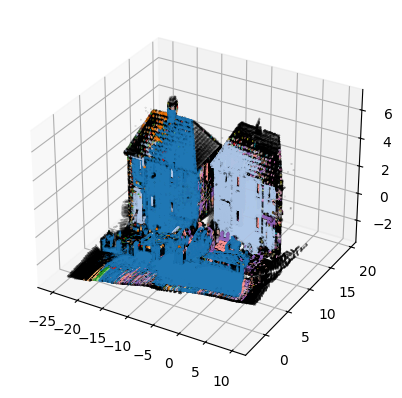

In [30]:
from mpl_toolkits import mplot3d

pc=np.asarray(pcd.points)
ax = plt.axes(projection='3d')
ax.scatter(pc[:,0], pc[:,1], pc[:,2], c = np.asarray(pcd.colors), s=0.01)
plt.show()

In [31]:

# Create an empty point cloud to hold everything
merged_segmented_cloud = o3d.geometry.PointCloud()

# Add all planar RANSAC segments
for i in range(max_plane_idx):  # max_plane_idx is typically set to 20
    merged_segmented_cloud += segments[i]

# Add the remaining clustered points (DBSCAN output)
merged_segmented_cloud += rest


In [32]:
output_path = "/content/segmented_output.ply"
o3d.io.write_point_cloud(output_path, merged_segmented_cloud)
print(f"✅ Saved segmented point cloud to: {output_path}")


✅ Saved segmented point cloud to: /content/segmented_output.ply
